In [131]:
#Importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [12]:
#data loading

In [102]:
a=pd.read_csv(r"C:\Users\Tusaar\Desktop\Datasets\customer_churn.csv")

In [103]:
a.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
# Selecting rows where 'gender' is 'Male', 'SeniorCitizen' is 1, and 'PaymentMethod' is 'Electronic check'

e=a[(a['gender']=='Male') & (a['SeniorCitizen']==1) & (a['PaymentMethod']=='Electronic check')]
e.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No


In [14]:
# Selecting rows where 'tenure' is greater than 70 OR 'MonthlyCharges' is greater than 100

f=a[(a['tenure']>70) | (a['MonthlyCharges']>100)]
f.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


In [ ]:
# Selecting rows where 'Contract' is 'Two year', 'PaymentMethod' is 'Mailed check', and 'Churn' is 'Yes'

g=a[(a['Contract']=='Two year') & (a['PaymentMethod']=='Mailed check') & (a['Churn']=='Yes')]
g

In [16]:
# Randomly selecting 100 samples from DataFrame 'a'

h=a.sample(n=100)
h

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6388,1963-VAUKV,Female,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,20.4,Yes
2086,2955-BJZHG,Male,0,Yes,Yes,17,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,No,Electronic check,80.85,1400.85,Yes
4732,1052-QJIBV,Female,0,Yes,Yes,71,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.90,1397.3,No
759,5684-FJVYR,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),90.35,6563.4,No
1345,2293-IJWPS,Female,0,Yes,No,57,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),100.75,5985,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6725,2061-VVFST,Female,0,Yes,No,37,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),19.50,805.2,No
2731,1110-KYLGQ,Female,0,No,No,63,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),108.25,6780.1,No
1745,2418-TPEUN,Female,0,Yes,Yes,56,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.80,1119.9,No
1213,6980-IMXXE,Female,0,Yes,Yes,69,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.20,1412.65,No


In [17]:
a["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
#data visualization

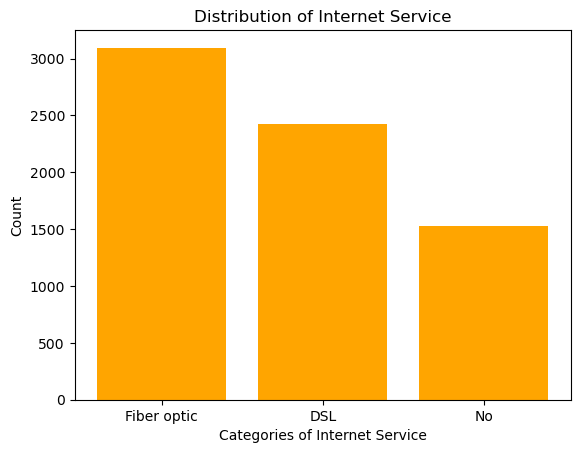

In [20]:
# Creating a bar chart to visualize the distribution of internet service categories

# Extracting unique internet service categories and their corresponding counts
categories = a["InternetService"].value_counts().keys().tolist()
counts = a["InternetService"].value_counts().tolist()

# Creating a bar chart with the extracted data, using the color 'orange'
plt.bar(categories, counts, color='orange')

# Adding labels to the x and y axes
plt.xlabel("Categories of Internet Service")
plt.ylabel("Count")

# Adding a title to the chart
plt.title("Distribution of Internet Service")

# Displaying the chart
plt.show()


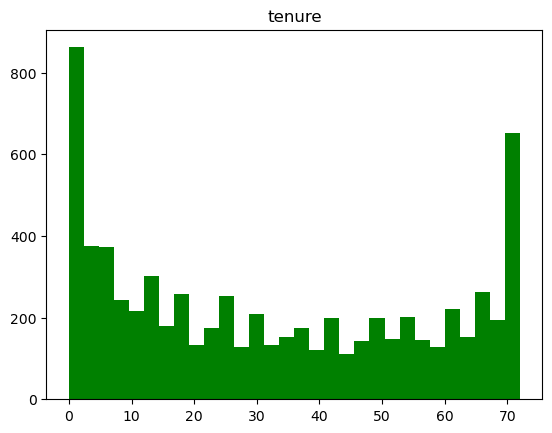

In [22]:
#plotting histogram with 30 bins

plt.hist(a['tenure'],bins=30,color="green")
plt.title("tenure")
plt.show()

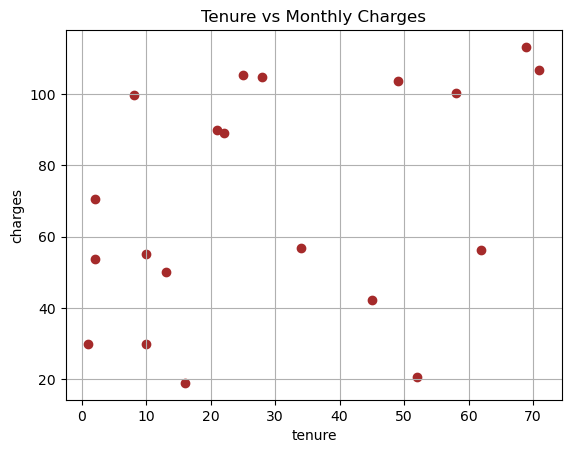

In [27]:
# Creating a scatter plot to visualize the relationship between 'tenure' and 'MonthlyCharges' for the first 20 rows

plt.scatter(x=a['tenure'].head(20),y=a['MonthlyCharges'].head(20),color='brown')
plt.xlabel("tenure")
plt.ylabel("charges")
plt.title('Tenure vs Monthly Charges')
plt.grid(True)
plt.show()


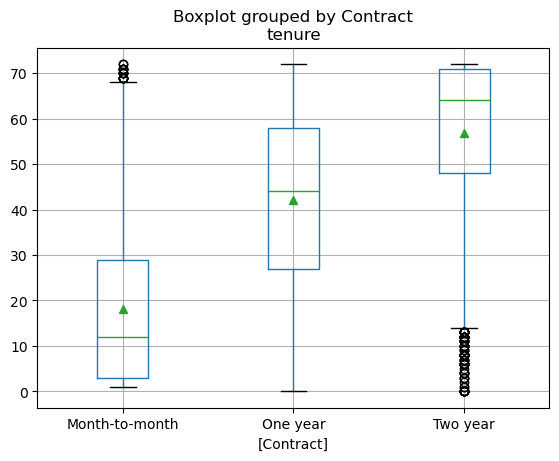

In [29]:
# Creating a bar chart to visualize internet service distribution
a.boxplot(column=['tenure'],by=['Contract'],showmeans=True)
plt.show()

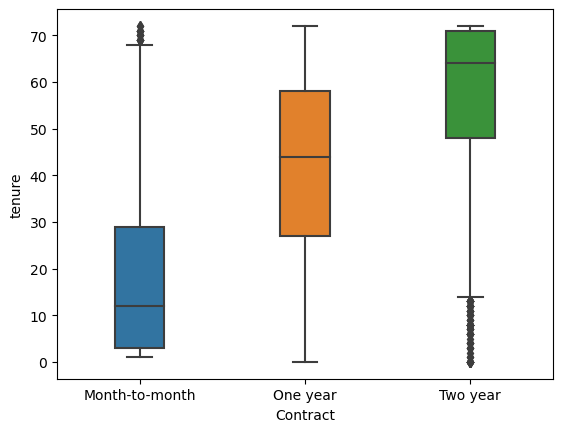

In [34]:
sns.boxplot('Contract','tenure',data=a,width=0.3)
plt.show()

In [ ]:
# machine learning

In [36]:
#Creating two separate DataFrames, x and y, to prepare your data for machine learning
x=pd.DataFrame(a['tenure'])
y=pd.DataFrame(a['MonthlyCharges'])

In [40]:
# Split the data into a training set (80%) and a testing set (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [43]:
model=LinearRegression()   #creating a model
model

LinearRegression()

In [45]:
model.fit(x_train,y_train)  #training

LinearRegression()

In [46]:
x_train

,tenure
2142,21
1623,54
6074,1
1362,4
6754,0
...,...
3772,1
5191,23
5226,12
5390,12


In [47]:
y_train

,MonthlyCharges
2142,64.85
1623,97.20
6074,23.45
1362,70.20
6754,61.90
...,...
3772,95.00
5191,91.10
5226,21.15
5390,99.45


In [49]:
model.predict(x_test)   #testing

array([[55.05490142],
       [67.56160793],
       [71.00095222],
       ...,
       [60.05758403],
       [76.31630248],
       [55.05490142]])

In [53]:
#Using the trained machine learning model 'model' to make predictions on the test data 'x_test'
y_pred=model.predict(x_test)
y_pred

array([[55.05490142],
       [67.56160793],
       [71.00095222],
       ...,
       [60.05758403],
       [76.31630248],
       [55.05490142]])

In [57]:
mse=mean_squared_error(x_test,y_pred)
mse

1353.5458446269847

In [58]:
rms=np.sqrt(mse) #finding root mean square value
rms

36.790567332225045

In [59]:
# logistic regression

In [68]:
#Preparing your data for logistic regression, with 'MonthlyCharges' as the input feature and 'Churn' as the target variable 

x=pd.DataFrame(a['MonthlyCharges'])
y=a['Churn']

In [70]:
# Splitting data into training and testing sets: X_train, X_test, Y_train, Y_test
# Using 65% for training, with a fixed random state (0) for reproducibility

X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.65,random_state=0)

In [71]:
# Creating a Logistic Regression model
model=LogisticRegression()

In [72]:
# Training the Logistic Regression model using the training data
model.fit(X_train,Y_train)

LogisticRegression()

In [73]:
# Making predictions using the trained Logistic Regression model on the test data
model.predict(X_test)

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [74]:
y_pred = model.predict(X_test)

In [75]:
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [77]:
# Calculating the accuracy score by comparing actual labels (Y_test) with predicted labels (y_pred)
accuracy_score(Y_test,y_pred)

0.7360097323600974

In [79]:
cm=confusion_matrix(Y_test,y_pred)
cm

array([[1815,    0],
       [ 651,    0]], dtype=int64)

In [80]:
#(TP+TN)+(TP+TN+FP+FN)
A=(1837+0)+(1837+0+629)
A

4303

In [104]:
#preparing data for a multiple logistic regression model with 'MonthlyCharges'&'tenure' as input features and 'Churn' as the target variable.
x=pd.DataFrame(a.loc[:,['MonthlyCharges','tenure']])
y=a['Churn']

In [84]:
# Splitting data into train and test sets (80% for training) with a fixed random state
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=10)

In [86]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [88]:
y_pred = logmodel.predict(x_test)
y_pred

array(['No', 'Yes', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [89]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[960, 197],
       [106, 146]], dtype=int64)

In [105]:
ac_s=accuracy_score(y_test,y_pred)
ac_s

0.7849538679914834

In [ ]:
# Printing the confusion matrix and classification report 
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

In [92]:
# decision tree

In [107]:
#Preparing data for a Decision Tree model with 'tenure' as input and 'Churn' as the target.
x=pd.DataFrame(a['tenure'])
y=a['Churn']

In [110]:
# Splitting data into train and test sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [113]:
#creating a Decision Tree classifier and then training it using the provided training data.  
classifier = DecisionTreeClassifier()  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier()

In [115]:
y_pred = classifier.predict(x_test)  

In [120]:
print(accuracy_score(y_test, y_pred))  #accuracy score  
print()
print(confusion_matrix(y_test, y_pred)) #confusion matrix   

0.7686302342086586

[[974  64]
 [262 109]]


In [121]:
#random forest

In [122]:
#Data prep for Random Forest
#Features - MonthlyCharges, tenure; Target - Churn.
x = a[['MonthlyCharges','tenure'] ]
y = a['Churn']

In [124]:
# Splitting data: 20% test, 80% train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)  

In [127]:
#Creating a Random Forest Classifier (100 estimators) and training with x_train and y_train.
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)

RandomForestClassifier()

In [134]:
# Making predictions on the test data using the Random Forest Classifier (clf)
y_pred=clf.predict(x_test)

In [129]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[895, 207],
       [143, 164]], dtype=int64)

In [130]:
ac=accuracy_score(y_pred,y_test)
ac

0.751596877217885

In [133]:
#Calculating and printing model accuracy (y_pred vs. y_test).
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.751596877217885


#                                                   Insights